# 🧪 Prueba Técnica NLP - Análisis Exploratorio y Preprocesamiento

👋 ¡Bienvenido(a) a esta prueba técnica!

En este ejercicio abordaremos el análisis de un conjunto de datos ampliamente utilizado en el ámbito del procesamiento de lenguaje natural: el CNN/DailyMail News Dataset. Este dataset contiene miles de artículos de noticias reales junto con sus respectivos resúmenes editoriales. La tarea está orientada a demostrar habilidades en análisis exploratorio de datos (EDA), preprocesamiento de texto y comprensión de datos no estructurados.

Esta prueba busca evaluar tanto la capacidad técnica como el pensamiento analítico aplicado al manejo de texto, una habilidad clave en proyectos de inteligencia artificial, sistemas de recomendación, motores de búsqueda, resúmenes automáticos y asistentes conversacionales.

#  🎯 Objetivo

El objetivo principal de esta prueba es realizar un análisis exploratorio y preprocesamiento textual del dataset CNN/DailyMail, con el fin de:

* Comprender la estructura, distribución y calidad de los textos disponibles.
* Aplicar técnicas de limpieza, normalización y análisis estadístico del lenguaje.

* Identificar patrones relevantes en los artículos y sus resúmenes, evaluando la viabilidad de aplicar modelos de NLP para tareas como resumen automático o clasificación temática.

Este ejercicio busca simular un escenario real en el que es necesario preparar datos textuales para su posterior uso en modelos de lenguaje o sistemas inteligentes.

In [1]:
# Install the latest versions of datasets and huggingface_hub
!pip install --upgrade datasets huggingface_hub fsspec

  Using cached fsspec-2025.5.0-py3-none-any.whl.metadata (11 kB)


In [2]:
from datasets import load_dataset

dataset = load_dataset("cnn_dailymail", "3.0.0")
df = dataset['train'].select(range(5000)).to_pandas() #No se decidio utilizar el 100% de los datos al ser muchos, lo que afectaba la eficiencia 


In [3]:
df.head(2)

,article,highlights,id
0,"LONDON, England (Reuters) -- Harry Potter star...",Harry Potter star Daniel Radcliffe gets £20M f...,42c027e4ff9730fbb3de84c1af0d2c506e41c3e4
1,Editor's note: In our Behind the Scenes series...,Mentally ill inmates in Miami are housed on th...,ee8871b15c50d0db17b0179a6d2beab35065f1e9


In [4]:
df.tail(2)

,article,highlights,id
4998,(CNN) -- Bringing a growing health concern to ...,Studies conflict; do not consistently show cel...,05091bd7113f6e8409191ddd474ebf6dcef784e4
4999,(Mental Floss) -- Have you ever wondered about...,"Thousand Island dressing is named after 1,793 ...",c46975509fa62df6eef05a3d55ade0fed7d8b40c


# Solución

## Comprensión de los datos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   article     5000 non-null   object
 1   highlights  5000 non-null   object
 2   id          5000 non-null   object
dtypes: object(3)
memory usage: 117.3+ KB


In [6]:
df['id'].duplicated().any()

False

In [7]:
import pandas as pd

# Mostrar el contenido completo de cada columna
pd.set_option('display.max_colwidth', None)

df.head(5)

article  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don't plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don't think I'll be particularly extravagant. "The things I like buying are things that cost

In [8]:
# Longitud de cada texto en la columna "article"
longitudes = df["article"].str.len()

# Máx
longitud_maxima = longitudes.max()
# mín
longitud_minima = longitudes.min()

print(f"Longitud máxima: {longitud_maxima}")
print(f"Longitud mínima: {longitud_minima}")

Longitud máxima: 11265
Longitud mínima: 106


Conclusiones:
El DataFrame analizado contiene tres variables de tipo string, cada una con 5,000 filas. No se identificaron datos duplicados ni faltantes. La clave primaria no presenta anomalías y se encuentra en buen estado. No obstante, las otras dos variables sí presentan inconsistencias. La columna "highlights" contiene el carácter "\n" en todas las filas, lo cual no es adecuado y debería corregirse. Por otro lado, la columna de artículos incluye símbolos como "--", que también deberían ser eliminados para garantizar la calidad de los datos. Otro aspecto relevante es la presencia recurrente de la frase "E-mail to a friend" casi al final o al final de los artículos; esta frase, junto con el contenido que le sigue, no aporta valor y resulta redundante

 La extensión de los artículos varía considerablemente, con longitudes que oscilan entre 11,265 caracteres en el caso más extenso y 106 caracteres en el más corto. Esta amplia dispersión sugiere que la columna "highlights", que corresponde al resumen de los artículos, también presenta una variabilidad significativa en su longitud.

## Limpieza y Transformación

### Variable "highlights"

In [9]:
# Variable "highlights"
df['highlights'] = df['highlights'].str.replace('\n', ' ', regex=True) #Elimina "\n"
df['highlights'] = df['highlights'].str.replace(r'\s+\.', '.', regex=True) #Elimina espacios innecesarios
df['highlights'] = df['highlights'].str.replace('NEW:', '', regex=False) #Elimina "NEW:"

df.head(5)


article  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don't plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don't think I'll be particularly extravagant. "The things I like buying are things that cost

### Variable "article"

In [10]:
df['article'] = df['article'].str.replace(r'E-mail to a friend.*', '', regex=True) #Elimina "E-mail to a friend*" y su continuación
df.head(15)

article  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don't plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don't think I'll 

In [11]:
df[['new', 'article2']] = df['article'].str.split(r'--', n=1, expand=True) #Separa la columna "article" por el delimitador "--"
df.head(10)

article  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don't plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don't think I'll b

In [12]:
df.drop(["article"], axis=1, inplace=True) #Elimina la variable "Article"
#df.head(10)

### Variable article2

In [13]:
df['article2'] = df['article2'].str.replace('--', '', regex=True) #Elimina "--" de la columna 'article2'
df.head(2)

,highlights,id,new,article2
0,Harry Potter star Daniel Radcliffe gets £20M fortune as he turns 18 Monday. Young actor says he has no plans to fritter his cash away. Radcliffe's earnings from first five Potter films have been held in trust fund.,42c027e4ff9730fbb3de84c1af0d2c506e41c3e4,"LONDON, England (Reuters)","Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him. Daniel Radcliffe as Harry Potter in ""Harry Potter and the Order of the Phoenix"" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. ""I don't plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar,"" he told an Australian interviewer earlier this month. ""I don't think I'll be particularly extravagant. ""The things I like buying are things that cost about 10 pounds books and CDs and DVDs."" At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film ""Hostel: Part II,"" currently six places below his number one movie on the UK box office chart. Details of how he'll mark his landmark birthday are under wraps. His agent and publicist had no comment on his plans. ""I'll definitely have some sort of party,"" he said in an interview. ""Hopefully none of you will be reading about it."" Radcliffe's earnings from the first five Potter films have been held in a trust fund which he has not been able to touch. Despite his growing fame and riches, the actor says he is keeping his feet firmly on the ground. ""People are always looking to say 'kid star goes off the rails,'"" he told reporters last month. ""But I try very hard not to go that way because it would be too easy for them."" His latest outing as the boy wizard in ""Harry Potter and the Order of the Phoenix"" is breaking records on both sides of the Atlantic and he will reprise the role in the last two films. Watch I-Reporter give her review of Potter's latest » . There is life beyond Potter, however. The Londoner has filmed a TV movie called ""My Boy Jack,"" about author Rudyard Kipling and his son, due for release later this year. He will also appear in ""December Boys,"" an Australian film about four boys who escape an orphanage. Earlier this year, he made his stage debut playing a tortured teenager in Peter Shaffer's ""Equus."" Meanwhile, he is braced for even closer media scrutiny now that he's legally an adult: ""I just think I'm going to be more sort of fair game,"" he told Reuters."
1,"Mentally ill inmates in Miami are housed on the ""forgotten floor"" Judge Steven Leifman says most are there as a result of ""avoidable felonies"" While CNN tours facility, patient shouts: ""I am the son of the president"" Leifman says the system is unjust and he's fighting for change.",ee8871b15c50d0db17b0179a6d2beab35065f1e9,"Editor's note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the ""forgotten floor,"" where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN)","The ninth floor of the Miami-Dade pretrial detention facility is dubbed the ""forgotten floor."" Here, inmates with the most severe mental illnesses are incarcerated until they're ready to appear in court. Most often, they face drug charges or charges of assaulting an officer charges that Judge Steven Leifman says are usually ""avoidable felonies."" He says the arrests often result from confrontations with police. Mentally ill people often won't do what they're told when police arrive on the scene confrontation seems to exacerbate their illness and they become more paranoid, delusional,

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gvand\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


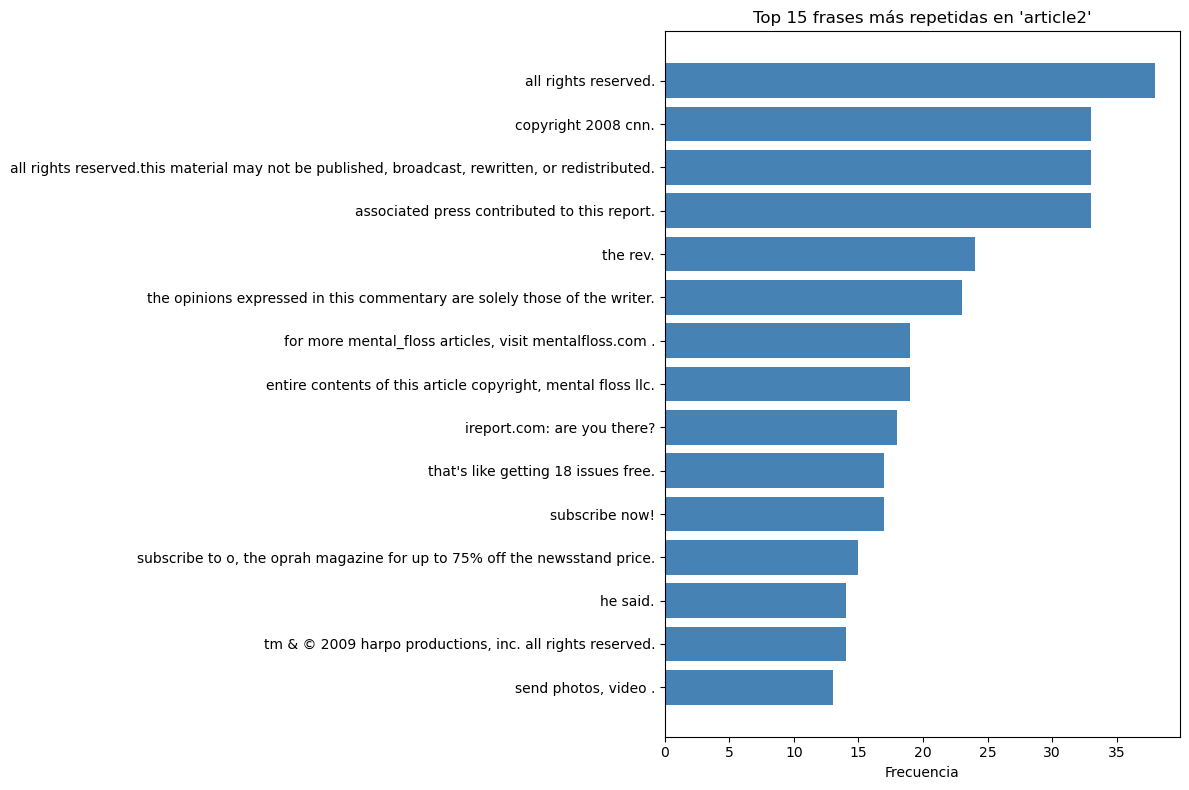

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
import re

nltk.download('punkt')

all_sentences = []

for text in df['article2'].dropna():
    sentences = nltk.sent_tokenize(text)
    clean_sentences = [re.sub(r'\s+', ' ', s.strip()).lower() for s in sentences if len(s.strip()) > 5]
    all_sentences.extend(clean_sentences)

sentence_counts = Counter(all_sentences)
top_15 = sentence_counts.most_common(15)

frases = [item[0] for item in top_15]
frecuencias = [item[1] for item in top_15]

plt.figure(figsize=(12, 8))
plt.barh(frases[::-1], frecuencias[::-1], color='steelblue')
plt.xlabel("Frecuencia")
plt.title("Top 15 frases más repetidas en 'article2'")
plt.tight_layout()
plt.show()



In [15]:
# Lista de frases innecesarias según la gráfica
frases_innecesarias = [
"all rights reserved.",
    "copyright 2008 cnn.",
    "all rights reserved.this material may not be published, broadcast, rewritten, or redistributed.",
    "associated press contributed to this report.",
    "the rev.",
    "the opinions expressed in this commentary are solely those of the writer.",
    "for more mental_floss articles, visit mentalfloss.com .",
    "entire contents of this article copyright, mental floss llc.",
    "ireport.com: are you there?",
    "that's like getting 18 issues free.",
    "subscribe now!.",
    "he said.",
    "send photos, video ."
]

# Eliminar frases 

def limpiar_texto(texto):
    for frase in frases_innecesarias:
        texto = re.sub(re.escape(frase), '', texto, flags=re.IGNORECASE)
    return texto.strip()

df['article2'] = df['article2'].apply(limpiar_texto)

TypeError: expected string or bytes-like object, got 'NoneType'

In [ ]:

frases_innecesarias = [
    "this material may not be published, broadcast, rewritten, or redistributed.",
    "tm & © 2009 harpo productions, inc.",
    "click here to try 2 risk free issues of entertainment weekly .",
    "copyright 2009 entertainment weekly and time inc.",
    "the following is an edited version of the interview.",
    "get a free trial issue of instyle - click here! .",
    "copyright © 2009 time inc.",
    "the following is an edited version of that interview.",
    "send photos, video .",
    "for entertainment weekly's take, click here.",
    "the opinions expressed in this commentary are solely those of bob greene.",
    "read more ."
]

def limpiar_texto(texto):
    for frase in frases_innecesarias:
        texto = re.sub(re.escape(frase), '', texto, flags=re.IGNORECASE)
    return texto.strip()

df['article2'] = df['article2'].apply(limpiar_texto)

TypeError: expected string or bytes-like object, got 'NoneType'

### Variable "new"

In [16]:
df.tail(2) #Muestra las dos ultimas filas


highlights  \
4998  Studies conflict; do not consistently show cell phones cause cancer, expert says. Expert says he cannot say they are definitely dangerous or definitely safe. Children are at higher risk for cancer-causing radiation from phone, scientist says. Woman at House panel hearing says her husband's brain cancer from cell phone.   
4999                                                                                         Thousand Island dressing is named after 1,793 islands in the Saint Lawrence River. Tabasco's founder imported peppers from the Mexican state of Tabasco. Hollandaise isn't actually Dutch; it's one of the most well known French sauces.   

                                            id              new  \
4998  05091bd7113f6e8409191ddd474ebf6dcef784e4           (CNN)    
4999  c46975509fa62df6eef05a3d55ade0fed7d8b40c  (Mental Floss)    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [17]:
df.loc[df['article2'].isna(), 'article2'] = df['new'] #Me rellena los nulos de "article2" con las filas de "new"
df.loc[df['article2'] == df['new'], 'new'] = None #Me elimina las filas de "new" que sean similares a "article2"
df.tail(2)

highlights  \
4998  Studies conflict; do not consistently show cell phones cause cancer, expert says. Expert says he cannot say they are definitely dangerous or definitely safe. Children are at higher risk for cancer-causing radiation from phone, scientist says. Woman at House panel hearing says her husband's brain cancer from cell phone.   
4999                                                                                         Thousand Island dressing is named after 1,793 islands in the Saint Lawrence River. Tabasco's founder imported peppers from the Mexican state of Tabasco. Hollandaise isn't actually Dutch; it's one of the most well known French sauces.   

                                            id              new  \
4998  05091bd7113f6e8409191ddd474ebf6dcef784e4           (CNN)    
4999  c46975509fa62df6eef05a3d55ade0fed7d8b40c  (Mental Floss)    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [18]:
df.head(3)

,highlights,id,new,article2
0,Harry Potter star Daniel Radcliffe gets £20M fortune as he turns 18 Monday. Young actor says he has no plans to fritter his cash away. Radcliffe's earnings from first five Potter films have been held in trust fund.,42c027e4ff9730fbb3de84c1af0d2c506e41c3e4,"LONDON, England (Reuters)","Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him. Daniel Radcliffe as Harry Potter in ""Harry Potter and the Order of the Phoenix"" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. ""I don't plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar,"" he told an Australian interviewer earlier this month. ""I don't think I'll be particularly extravagant. ""The things I like buying are things that cost about 10 pounds books and CDs and DVDs."" At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film ""Hostel: Part II,"" currently six places below his number one movie on the UK box office chart. Details of how he'll mark his landmark birthday are under wraps. His agent and publicist had no comment on his plans. ""I'll definitely have some sort of party,"" he said in an interview. ""Hopefully none of you will be reading about it."" Radcliffe's earnings from the first five Potter films have been held in a trust fund which he has not been able to touch. Despite his growing fame and riches, the actor says he is keeping his feet firmly on the ground. ""People are always looking to say 'kid star goes off the rails,'"" he told reporters last month. ""But I try very hard not to go that way because it would be too easy for them."" His latest outing as the boy wizard in ""Harry Potter and the Order of the Phoenix"" is breaking records on both sides of the Atlantic and he will reprise the role in the last two films. Watch I-Reporter give her review of Potter's latest » . There is life beyond Potter, however. The Londoner has filmed a TV movie called ""My Boy Jack,"" about author Rudyard Kipling and his son, due for release later this year. He will also appear in ""December Boys,"" an Australian film about four boys who escape an orphanage. Earlier this year, he made his stage debut playing a tortured teenager in Peter Shaffer's ""Equus."" Meanwhile, he is braced for even closer media scrutiny now that he's legally an adult: ""I just think I'm going to be more sort of fair game,"" he told Reuters."
1,"Mentally ill inmates in Miami are housed on the ""forgotten floor"" Judge Steven Leifman says most are there as a result of ""avoidable felonies"" While CNN tours facility, patient shouts: ""I am the son of the president"" Leifman says the system is unjust and he's fighting for change.",ee8871b15c50d0db17b0179a6d2beab35065f1e9,"Editor's note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the ""forgotten floor,"" where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN)","The ninth floor of the Miami-Dade pretrial detention facility is dubbed the ""forgotten floor."" Here, inmates with the most severe mental illnesses are incarcerated until they're ready to appear in court. Most often, they face drug charges or charges of assaulting an officer charges that Judge Steven Leifman says are usually ""avoidable felonies."" He says the arrests often result from confrontations with police. Mentally ill people often won't do what they're told when police arrive on the scene confrontation seems to exacerbate their illness and they become more paranoid, delusional,

In [19]:
df['journal'] = df['new'].str.extract(r'\((.*?)\)')
df.head(3)

,highlights,id,new,article2,journal
0,Harry Potter star Daniel Radcliffe gets £20M fortune as he turns 18 Monday. Young actor says he has no plans to fritter his cash away. Radcliffe's earnings from first five Potter films have been held in trust fund.,42c027e4ff9730fbb3de84c1af0d2c506e41c3e4,"LONDON, England (Reuters)","Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him. Daniel Radcliffe as Harry Potter in ""Harry Potter and the Order of the Phoenix"" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. ""I don't plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar,"" he told an Australian interviewer earlier this month. ""I don't think I'll be particularly extravagant. ""The things I like buying are things that cost about 10 pounds books and CDs and DVDs."" At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film ""Hostel: Part II,"" currently six places below his number one movie on the UK box office chart. Details of how he'll mark his landmark birthday are under wraps. His agent and publicist had no comment on his plans. ""I'll definitely have some sort of party,"" he said in an interview. ""Hopefully none of you will be reading about it."" Radcliffe's earnings from the first five Potter films have been held in a trust fund which he has not been able to touch. Despite his growing fame and riches, the actor says he is keeping his feet firmly on the ground. ""People are always looking to say 'kid star goes off the rails,'"" he told reporters last month. ""But I try very hard not to go that way because it would be too easy for them."" His latest outing as the boy wizard in ""Harry Potter and the Order of the Phoenix"" is breaking records on both sides of the Atlantic and he will reprise the role in the last two films. Watch I-Reporter give her review of Potter's latest » . There is life beyond Potter, however. The Londoner has filmed a TV movie called ""My Boy Jack,"" about author Rudyard Kipling and his son, due for release later this year. He will also appear in ""December Boys,"" an Australian film about four boys who escape an orphanage. Earlier this year, he made his stage debut playing a tortured teenager in Peter Shaffer's ""Equus."" Meanwhile, he is braced for even closer media scrutiny now that he's legally an adult: ""I just think I'm going to be more sort of fair game,"" he told Reuters.",Reuters
1,"Mentally ill inmates in Miami are housed on the ""forgotten floor"" Judge Steven Leifman says most are there as a result of ""avoidable felonies"" While CNN tours facility, patient shouts: ""I am the son of the president"" Leifman says the system is unjust and he's fighting for change.",ee8871b15c50d0db17b0179a6d2beab35065f1e9,"Editor's note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the ""forgotten floor,"" where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN)","The ninth floor of the Miami-Dade pretrial detention facility is dubbed the ""forgotten floor."" Here, inmates with the most severe mental illnesses are incarcerated until they're ready to appear in court. Most often, they face drug charges or charges of assaulting an officer charges that Judge Steven Leifman says are usually ""avoidable felonies."" He says the arrests often result from confrontations with police. Mentally ill people often won't do what they're told when police arrive on the scene confrontation seems to exacerbate their illness and they become more paran

## Análisis exploratorio

### Journal

In [20]:
# Ver categorías únicas y su frecuencia
conteo = df['journal'].value_counts()
print(conteo)

journal
CNN                                                                                                                                                                                                                   4621
AOL Autos                                                                                                                                                                                                               27
Mental Floss                                                                                                                                                                                                            24
InStyle.com                                                                                                                                                                                                             19
Reuters                                                                                                             

In [21]:
#Se usaran las 5 revistas que más tengan datos para 
rev = ['CNN', 'AOL Autos', 'Mental Floss', 'InStyle.com', 'Reuters']
df_seg = df[df['journal'].isin(rev)]

In [22]:
counts = df_seg['journal'].value_counts()

# Crear el gráfico de torta
import plotly.express as px
fig = px.pie(values=counts, names=counts.index)
fig.show()

Conclusiones: Al tratarse de una base de datos proveniente de CNN, es comprensible que la mayoría de los datos correspondan a este medio. No obstante, también se identifican otras fuentes como Reuters, aunque con una presencia significativamente menor.

### Country

In [23]:
pai = ['CNN']
df2 = df[df['journal'].isin(pai)]

In [24]:
#df2.head(2)

In [25]:
import re
def extraer_palabra_antes_cnn(texto):
    match = re.search(r'(\w+)\s+\(CNN\)', str(texto))
    if match:
        return match.group(1)
    else:
        return "nulo"  

# Aplica la función a la columna 'new' y guarda en una nueva columna
df2['country'] = df2['new'].apply(extraer_palabra_antes_cnn)
#df2.head(10)

C:\Users\gvand\AppData\Local\Temp\ipykernel_11628\2524321748.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
df2.drop(["new"], axis=1, inplace=True) #Elimina la variable "new"
df2.head(1)


C:\Users\gvand\AppData\Local\Temp\ipykernel_11628\1264374385.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,highlights,id,article2,journal,country
1,"Mentally ill inmates in Miami are housed on the ""forgotten floor"" Judge Steven Leifman says most are there as a result of ""avoidable felonies"" While CNN tours facility, patient shouts: ""I am the son of the president"" Leifman says the system is unjust and he's fighting for change.",ee8871b15c50d0db17b0179a6d2beab35065f1e9,"The ninth floor of the Miami-Dade pretrial detention facility is dubbed the ""forgotten floor."" Here, inmates with the most severe mental illnesses are incarcerated until they're ready to appear in court. Most often, they face drug charges or charges of assaulting an officer charges that Judge Steven Leifman says are usually ""avoidable felonies."" He says the arrests often result from confrontations with police. Mentally ill people often won't do what they're told when police arrive on the scene confrontation seems to exacerbate their illness and they become more paranoid, delusional, and less likely to follow directions, according to Leifman. So, they end up on the ninth floor severely mentally disturbed, but not getting any real help because they're in jail. We toured the jail with Leifman. He is well known in Miami as an advocate for justice and the mentally ill. Even though we were not exactly welcomed with open arms by the guards, we were given permission to shoot videotape and tour the floor. Go inside the 'forgotten floor' » . At first, it's hard to determine where the people are. The prisoners are wearing sleeveless robes. Imagine cutting holes for arms and feet in a heavy wool sleeping bag that's kind of what they look like. They're designed to keep the mentally ill patients from injuring themselves. That's also why they have no shoes, laces or mattresses. Leifman says about one-third of all people in Miami-Dade county jails are mentally ill. So, he says, the sheer volume is overwhelming the system, and the result is what we see on the ninth floor. Of course, it is a jail, so it's not supposed to be warm and comforting, but the lights glare, the cells are tiny and it's loud. We see two, sometimes three men sometimes in the robes, sometimes naked, lying or sitting in their cells. ""I am the son of the president. You need to get me out of here!"" one man shouts at me. He is absolutely serious, convinced that help is on the way if only he could reach the White House. Leifman tells me that these prisoner-patients will often circulate through the system, occasionally stabilizing in a mental hospital, only to return to jail to face their charges. It's brutally unjust, in his mind, and he has become a strong advocate for changing things in Miami. Over a meal later, we talk about how things got this way for mental patients. Leifman says 200 years ago people were considered ""lunatics"" and they were locked up in jails even if they had no charges against them. They were just considered unfit to be in society. Over the years, he says, there was some public outcry, and the mentally ill were moved out of jails and into hospitals. But Leifman says many of these mental hospitals were so horrible they were shut down. Where did the patients go? Nowhere. The streets. They became, in many cases, the homeless, he says. They never got treatment. Leifman says in 1955 there were more than half a million people in state mental hospitals, and today that number has been reduced 90 percent, and 40,000 to 50,000 people are in mental hospitals. The judge says he's working to change this. Starting in 2008, many inmates who would otherwise have been brought to the ""forgotten floor"" will instead be sent to a new mental health facility the first step on a journey toward long-term treatment, not just punishment. Leifman says it's not the complete answer, but it's a start. Leifman says the best part is that it's a win-win solution. The patients win, the families are relieved, and the state saves money by simply not cycling these prisoners through again and again. And, for Leifman, 

In [27]:
df2.tail(1)

highlights  \
4998  Studies conflict; do not consistently show cell phones cause cancer, expert says. Expert says he cannot say they are definitely dangerous or definitely safe. Children are at higher risk for cancer-causing radiation from phone, scientist says. Woman at House panel hearing says her husband's brain cancer from cell phone.   

                                            id  \
4998  05091bd7113f6e8409191ddd474ebf6dcef784e4   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [28]:
# Ver categorías únicas y su frecuencia
df2 = df2[~df2['country'].str.strip().str.lower().eq('nulo')]
df2['country'] = df2['country'].replace('Washington', 'WASHINGTON')


In [29]:
df2['country'] = df2['country'].replace('WASHINGTON', 'USA')
df2['country'] = df2['country'].replace('London', 'England')
df2['country'] = df2['country'].replace('York', 'USA')
df2['country'] = df2['country'].replace('California', 'USA')
df2['country'] = df2['country'].replace('Angeles', 'USA')
df2['country'] = df2['country'].replace('YORK', 'USA')
df2['country'] = df2['country'].replace('Kong', 'China')

In [30]:
conteo = df2['country'].value_counts()
print(conteo)

country
USA            845
England        338
Georgia        106
Iraq            92
Florida         83
              ... 
Philippines      1
Malaysia         1
Quebec           1
Guatemala        1
Nicaragua        1
Name: count, Length: 136, dtype: int64


In [31]:
#Se usaran los 5 paises que más produzcan mas noticias
pai = ['USA', 'England', 'China', 'Pakistan', 'Georgia']
df_f = df2[df2['country'].isin(pai)]

In [32]:
counts = df_f['country'].value_counts()

# Crear el gráfico de torta
import plotly.express as px
fig = px.pie(values=counts, names=counts.index)
fig.show()

Conclusiones: Dado que CNN es un medio de comunicación estadounidense, era previsible que la categoria USA predominara como el país más mencionado en sus artículos. El segundo país con mayor presencia es el Reino Unido, que, aunque destaca frente a los demás, se encuentra considerablemente por debajo del primero.